In [94]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd 
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [95]:
import tensorflow as tf

# RNN time series prediction
    ## using generated data, t.sin(t)/3 + 2.sin(5t) , del_t =0.1 , from t = 0 to 30

In [97]:
t = np.linspace(0, 30, 30*10 + 1)
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

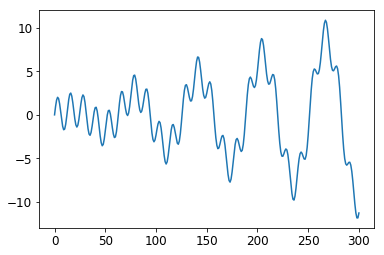

In [98]:
# generating time series 

data = t*np.sin(t)/3 + 2*np.sin(5*t)
plt.plot(data)

# prepare data for input

In [99]:
import random 
# for i in range(300):
#     print(random.randint(0,280))
    
# reshape usage 
a = range(12)
np.reshape(a,[3,-1,1])

array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]])

In [100]:
a= range(120)
np.reshape(a,[-1,20,1])

array([[[  0],
        [  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19]],

       [[ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39]],

       [[ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59]],

       [[ 60],
        [ 61],
        [ 62],
        [ 63],
        [ 64],
        [ 65],
    

In [21]:
# connect 2 np.array 
np.hstack((data[:20], data[1:21]))

array([ 0.        ,  0.96217886,  1.69618659,  2.02454199,  1.8705173 ,
        1.27684854,  0.39516851, -0.551249  , -1.32231003, -1.72006216,
       -1.63735822, -1.08430462, -0.18601536,  0.84778186,  1.77384974,
        2.37474745,  2.51182241,  2.15891762,  1.40854555,  0.44902115,
        0.96217886,  1.69618659,  2.02454199,  1.8705173 ,  1.27684854,
        0.39516851, -0.551249  , -1.32231003, -1.72006216, -1.63735822,
       -1.08430462, -0.18601536,  0.84778186,  1.77384974,  2.37474745,
        2.51182241,  2.15891762,  1.40854555,  0.44902115, -0.48184394])

In [22]:
X_batch = []
y_batch = []
for i in range(150):
    rnd = random.randint(0,280)
    X_batch = np.hstack( (  X_batch , data[rnd:(rnd + 20)] ) )  
    y_batch=np.hstack( (  y_batch , data[(rnd+ 1):(rnd + 21)]  ) )
X_batch = np.reshape(X_batch,[-1,20,1])
y_batch = np.reshape(y_batch,[-1,20,1])
print(X_batch.shape)
print(X_batch)

(150, 20, 1)
[[[ 1.80308053]
  [ 2.82782733]
  [ 3.39867043]
  ...
  [ 5.14280405]
  [ 4.03671208]
  [ 3.00110646]]

 [[-2.78738766]
  [-1.86291062]
  [-0.85576825]
  ...
  [ 2.68521472]
  [ 2.64644482]
  [ 2.17815563]]

 [[10.55711517]
  [10.89963146]
  [10.66365284]
  ...
  [-0.49804774]
  [-2.36210061]
  [-3.9330759 ]]

 ...

 [[-1.08430462]
  [-0.18601536]
  [ 0.84778186]
  ...
  [ 2.29387032]
  [ 2.10106446]
  [ 1.44169569]]

 [[ 0.84778186]
  [ 1.77384974]
  [ 2.37474745]
  ...
  [ 1.44169569]
  [ 0.45590165]
  [-0.63807239]]

 [[-3.02242759]
  [-2.16285865]
  [-0.92793235]
  ...
  [ 6.17061569]
  [ 6.66231886]
  [ 6.62610213]]]


# RNN time series data  
    ## predict one step ahead

In [101]:
reset_graph()

n_steps=20
n_inputs=1
n_neurons=100
n_outputs = 1

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.float32,[None,n_steps,n_outputs])

# wrap outputneurons by dense layer and make one output for each time step
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell( num_units=n_neurons , activation=tf.nn.relu ),
    output_size=n_outputs )
outputs, states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

In [102]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y ))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
# save the training data 
saver = tf.train.Saver()

In [25]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        # data input phase 
        X_batch = []
        y_batch = []
        for i in range(batch_size):
            rnd = random.randint(0,280)
            X_batch = np.hstack( (  X_batch , data[rnd:(rnd + 20)] ) )  
            y_batch=np.hstack( (  y_batch , data[(rnd+ 1):(rnd + 21)]  ) )
        X_batch = np.reshape(X_batch,[-1,20,1])
        y_batch = np.reshape(y_batch,[-1,20,1])
        
        sess.run(training_op,feed_dict= { X: X_batch, y: y_batch })
        if iteration % 100 == 0 :
                mse = loss.eval(feed_dict={X:X_batch,y:y_batch})
                print(iteration,"\tMSE:",mse)
    save_path = saver.save(sess,"trained_model/rnn_model1.ckpt")

0 	MSE: 18.907963
100 	MSE: 0.32175356
200 	MSE: 0.22604942
300 	MSE: 0.07999809
400 	MSE: 0.09887299
500 	MSE: 0.106927514
600 	MSE: 0.13640831
700 	MSE: 0.040953454
800 	MSE: 0.053346027
900 	MSE: 0.016196968
1000 	MSE: 0.080083095
1100 	MSE: 0.09574043
1200 	MSE: 0.07918755
1300 	MSE: 0.12220085
1400 	MSE: 0.03683092


In [103]:
with tf.Session() as sess:
    saver.restore(sess, "trained_model/rnn_model1.ckpt")
        
    t = np.linspace(12,13.9,20)
    X_new = t*np.sin(t)/3 + 2*np.sin(5*t)
    X_new = X_new.reshape([-1,20,1])
    y_pred = sess.run(outputs,feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from trained_model/rnn_model1.ckpt


In [27]:
from tensorflow_graph_in_jupyter import show_graph
show_graph(tf.get_default_graph())

(-5, 7)

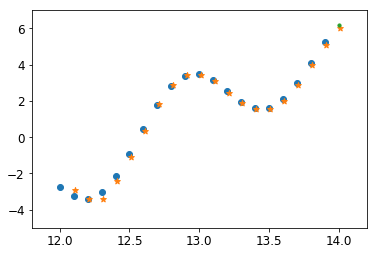

In [104]:
# generating time series 
t = np.linspace(12,13.9,20)
X_new = t*np.sin(t)/3 + 2*np.sin(5*t)
tt = 14
x_last =  tt*np.sin(tt)/3 + 2*np.sin(5*tt)

plt.scatter(t,X_new,marker="o")
plt.scatter(t+0.11 ,y_pred,marker="*")
plt.scatter(tt,x_last,marker="o",s=10)
plt.xlim(11.8,14.2)
plt.ylim(-5,7)

# RNN time series data  
    ## predict three step ahead

In [106]:
reset_graph()

n_steps=20
n_inputs=1
n_neurons=100
n_outputs = 3

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.float32,[None,n_steps,n_outputs])

# wrap outputneurons by dense layer and make one output for each time step
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell( num_units=n_neurons , activation=tf.nn.relu ),
    output_size=n_outputs )
outputs, states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

In [107]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs[:,19,:] - y[:,19,:] ))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
# save the training data 
saver = tf.train.Saver()

In [77]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        # data input phase 
        X_batch = []
        y_batch = []
        for ite in range(batch_size):
            rnd = random.randint(0,278)
            X_batch = np.hstack( (  X_batch , data[rnd:(rnd + 20)] ) ) 
            for i in range(20):
                y_batch=np.hstack( (  y_batch , data[(rnd+ i + 1):(rnd + i + 4)]  ) )
        X_batch = np.reshape(X_batch,[-1,20,1])
        y_batch = np.reshape(y_batch,[-1,20,3])
        
        sess.run(training_op,feed_dict= { X: X_batch, y: y_batch })
        if iteration % 100 == 0 :
                mse = loss.eval(feed_dict={X:X_batch,y:y_batch})
                print(iteration,"\tMSE:",mse)
    save_path = saver.save(sess,"trained_model/rnn_model1_3step.ckpt")

0 	MSE: 22.042238
100 	MSE: 0.10781387
200 	MSE: 0.030084375
300 	MSE: 0.015749602
400 	MSE: 0.0074496055
500 	MSE: 0.005772086
600 	MSE: 0.0045133783
700 	MSE: 0.004238477
800 	MSE: 0.002263093
900 	MSE: 0.0034387768
1000 	MSE: 0.017535876
1100 	MSE: 0.0047907173
1200 	MSE: 0.0030236149
1300 	MSE: 0.003923513
1400 	MSE: 0.0019435419


In [108]:
with tf.Session() as sess:
    saver.restore(sess, "trained_model/rnn_model1_3step.ckpt")
    print(outputs)    
    t = np.linspace(12,13.9,20)
    X_new = t*np.sin(t)/3 + 2*np.sin(5*t)
    X_new = X_new.reshape([-1,20,1])
    y_pred = sess.run(outputs,feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from trained_model/rnn_model1_3step.ckpt
Tensor("rnn/transpose_1:0", shape=(?, 20, 3), dtype=float32)


(-5, 7)

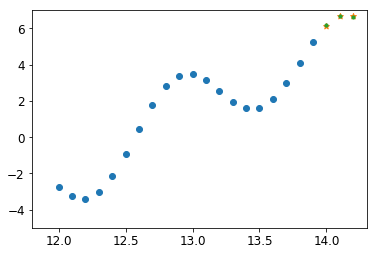

In [80]:
# generating time series 
t = np.linspace(12,13.9,20)
X_new = t*np.sin(t)/3 + 2*np.sin(5*t)
tt = np.array([14,14.1,14.2])
x_last =  tt*np.sin(tt)/3 + 2*np.sin(5*tt)

plt.scatter(t,X_new,marker="o")
plt.scatter(tt ,y_pred[0][-1],marker="*")
plt.scatter(tt,x_last,marker="o",s=10)
plt.xlim(11.8,14.3)
plt.ylim(-5,7)

# RNN time series data  
    ## predict 6 step ahead

In [127]:
reset_graph()

n_steps=20
n_inputs=1
n_neurons=100
n_outputs = 6

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.float32,[None,n_steps,n_outputs])

# wrap outputneurons by dense layer and make one output for each time step
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell( num_units=n_neurons , activation=tf.nn.relu ),
    output_size=n_outputs )
outputs, states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

In [128]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs[:,19,:] - y[:,19,:] ))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
# save the training data 
saver = tf.train.Saver()

In [89]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        # data input phase 
        X_batch = []
        y_batch = []
        for ite in range(batch_size):
            rnd = random.randint(0,275)
            X_batch = np.hstack( (  X_batch , data[rnd:(rnd + 20)] ) ) 
            for i in range(20):
                y_batch=np.hstack( (  y_batch , data[(rnd+ i + 1):(rnd + i + 7)]  ) )
        X_batch = np.reshape(X_batch,[-1,20,1])
        y_batch = np.reshape(y_batch,[-1,20,6])
        
        sess.run(training_op,feed_dict= { X: X_batch, y: y_batch })
        if iteration % 100 == 0 :
                mse = loss.eval(feed_dict={X:X_batch,y:y_batch})
                print(iteration,"\tMSE:",mse)
    save_path = saver.save(sess,"trained_model/rnn_model1_6step.ckpt")

0 	MSE: 16.288923
100 	MSE: 2.6771505
200 	MSE: 0.37253094
300 	MSE: 0.06365045
400 	MSE: 0.029706614
500 	MSE: 0.02070986
600 	MSE: 0.019699989
700 	MSE: 0.013337555
800 	MSE: 0.012243841
900 	MSE: 0.06399224
1000 	MSE: 0.010974261
1100 	MSE: 0.005608219
1200 	MSE: 0.0099079935
1300 	MSE: 0.008300094
1400 	MSE: 0.0047495803


In [111]:
with tf.Session() as sess:
    saver.restore(sess, "trained_model/rnn_model1_6step.ckpt")
   
    t = np.linspace(12,13.9,20)
    X_new = t*np.sin(t)/3 + 2*np.sin(5*t)
    X_new = X_new.reshape([-1,20,1])
    y_pred = sess.run(outputs,feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from trained_model/rnn_model1_6step.ckpt


(-5, 7)

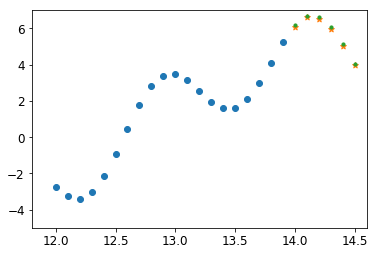

In [112]:
# generating time series 
t = np.linspace(12,13.9,20)
X_new = t*np.sin(t)/3 + 2*np.sin(5*t)
tt = np.linspace(14,14.5,6)
x_last =  tt*np.sin(tt)/3 + 2*np.sin(5*tt)

plt.scatter(t,X_new,marker="o")
plt.scatter(tt ,y_pred[0][-1],marker="*")
plt.scatter(tt,x_last,marker="o",s=10)
plt.xlim(11.8,14.6)
plt.ylim(-5,7)

# evaluation using SSE ( sum of squared errors ) 

In [119]:
t[300]

30.0

Text(0.5,1,'data')

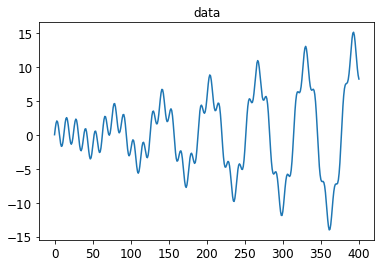

In [157]:
t = np.linspace(0, 40, 40*10 + 1)
test_data = t*np.sin(t)/3 + 2*np.sin(5*t)
plt.plot(data)
plt.title("data")

In [131]:
reset_graph()

n_steps=20
n_inputs=1
n_neurons=100
n_outputs = 6

X = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y = tf.placeholder(tf.float32,[None,n_steps,n_outputs])

# wrap outputneurons by dense layer and make one output for each time step
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell( num_units=n_neurons , activation=tf.nn.relu ),
    output_size=n_outputs )
outputs, states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs[:,19,:] - y[:,19,:] ))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
# save the training data 
saver = tf.train.Saver()

In [189]:
'''
    unrolling test method 
1.give test_first index. 
2.predict with n_steps data before test_first 
3.take SSE between prediction and test data for n_pred_steps data 
4.plus 1 to test_fisrt index, and do 1-3 
5. do 1-4 for n_times_eval times. 
'''

SSE = 0 
n_steps = 20
n_pred_steps = 3
test_first = 31
n_times_eval = 10

model = "trained_model/rnn_model1_6step.ckpt"



with tf.Session() as sess:
    saver.restore(sess, model)
    for test_first in [i for i in np.linspace(301,381,9)]:
        test_first = int(test_first)
        SSE=0
        #plt.plot(test_data[test_first:(test_first + 20)])
        for k,iteration in enumerate( range(n_times_eval) ) :
            X_pred = test_data[(test_first - n_steps ):test_first].reshape([-1,20,1])
            y_pred = sess.run(outputs,feed_dict={X:X_pred})
            SSE = SSE + sum(  ( y_pred[0][-1][:n_pred_steps] - test_data[test_first:(test_first + n_pred_steps)] )**2 )

            x =[i for i in  range(k,n_pred_steps+k)]
            #plt.scatter(x,y_pred[0][-1][:n_pred_steps],marker="*")

            test_first +=1 
        print(SSE)

INFO:tensorflow:Restoring parameters from trained_model/rnn_model1_6step.ckpt
0.7061636302369156
0.9930346331852006
0.7575510499551896
0.5218675253706463
0.3444186348708892
0.2357486431649927
2.6395740947949364
1.463410130789419
3.0633502275316857
